## Module assignment 6 
- INFO 3401 Fall 2020
- Topic: APIs and JSON
- 200 points

### Intro

Some sing about love, some sing about money. In this assignment, we will use the Spotify API to investigate who sings about what.

We will be using the Spotipy wrapper to access the API. Both the API and the wrapper illustrate a number of common patterns in working with APIs including: 

1. **Authentication.** _Getting set up with a service, and proving you are who you say you are_

2. **Pagination.** _Accessing data in chunks or pages_

3. **Python wrapper libraries.** _Using wrapper code to access API endpoints with Python objects_

4. **Nesting and linking.** _Working with nested and linked JSON objects that come back from an API_

It's very useful to be comfortable working with APIs in general. This module will give you practice with one specific API to help build up your capacity to work with other APIs in the future.

### Setup [20 points]

#### Step One: Registration
To do this assignment, you will need to get set up with the Spotify API. Here is a [link](https://developer.spotify.com/documentation/web-api/quick-start/) to the Spotify site to get started. Please follow the sections "Set Up Your Account" and "Register Your Application" to tell Spotify that you are a creating an application. **You should NOT setup a nodejs environment. Just follow the steps to create an account and register a sample application**. 

#### Step Two: Lookup
Once you are set up, you should be able to go to your Spotify ["Dashboard"](https://developer.spotify.com/dashboard/applications), click on your application and learn your `Client ID` and `Client Secret`. 

#### Step Three: Configuration
You should set up [environment variables](https://askubuntu.com/questions/58814/how-do-i-add-environment-variables) `CLIENT_ID` and `CLIENT_SECRET`. We covered how to do this in class on 11/16 so please consult the recording for extra help. You want to fill these variables with the Client ID and Client Secret from the Spotify dashboard.

#### Step Four: Installation
You should install spotipy in the same environment where you set your `CLIENT_ID` and `CLIENT_SECRET` variables using the command `$pip install spotipy --upgrade`.

#### Step Five: Verification
If you are correctly set up, you should be able to run the cell below without error to print out the albums from the English singer [Birdy](https://www.officialbirdy.com/). This is the example on the "Welcome to Spotipy" [documentation page](https://spotipy.readthedocs.io/en/2.16.1/). Often APIs give you a minimal example to help you get started.

### Step 3: Configuration

I worked very hard for a long time trying to figure out environment variables but just could not get it to work. As a result I looked for other solutions I could use and stumbled across the getpass module which seems to do the trick. I hope that this will suffice. 

source: http://veekaybee.github.io/2020/02/25/secrets/

In [247]:
import getpass

In [254]:
CLIENT_ID = getpass.getpass()

········


In [255]:
CLIENT_SECRET = getpass.getpass()

········


In [256]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))


### Run the following cell to show that you have setup Spotipy

In [257]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

results = spotify.artist_albums(birdy_uri, album_type='album')

albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


### Search for love song artists and save results [10 points]

- Use the `spotipy.search` [method](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.search) to search for songs that mention the word `love`.
- You will get back data that includes a `tracks` field with a list of `items` in it. Iterate over the items and fill a list of artists who sing love songs. Each artist should be a Python dictionary with two fields: `artist` and `artist_id`, representing an artist associated with some track returned from the search.
- Note that the artist field returned from calls to Spotify is a list of artists. You should make dictionary for _each_ artist in the list.
- Note that you should make 200 calls to the search method, using the `offset` parameter to get new pages and setting the `limit` field to 50. 
- There is some starter code to help you with all of this.

In [173]:
love_songs_artists = []

for offset in range(200):
    if offset % 10 == 0:
        print("iter=", offset)
    results = spotify.search(q='love', type='track', limit=50, offset=offset)
    # fill love_songs_artists with a list of dictionaries. Each dictionary should 
    # have two fields: artist and artist_id
    for item in results["tracks"]["items"]:
        for i in item["artists"]:
          #  print(i["name"])
            name = i["name"]
            _id = i["id"]
            love_songs_artists_dict = {}
            love_songs_artists_dict["artist"] = name
            love_songs_artists_dict["id"] = _id
            love_songs_artists.append(love_songs_artists_dict)

iter= 0
iter= 10
iter= 20
iter= 30
iter= 40
iter= 50
iter= 60
iter= 70
iter= 80
iter= 90
iter= 100
iter= 110
iter= 120
iter= 130
iter= 140
iter= 150
iter= 160
iter= 170
iter= 180
iter= 190


### Check in

Run the cell below to turn your list of love songs into a dataframe. Do not modify the next cell.

In [174]:
### Do not modify this cell
love_songs_artists = pd.DataFrame(love_songs_artists)
print(len(love_songs_artists)) # include this line. Do not remove 
love_songs_artists

12820


,artist,id
0,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH
1,Khalid,6LuN9FCkKOj5PcnpouEgny
2,Ariana Grande,66CXWjxzNUsdJxJ2JdwvnR
3,BLACKPINK,41MozSoPIsD1dJM0CLPjZF
4,Russell Dickerson,1E2AEtxaFaJtH0lO7kgNKw
...,...,...
12815,Ollie MN,5sH4dr4r46Vm0Qu84PAYvk
12816,Calvin Harris,7CajNmpbOovFoOoasH2HaY
12817,Disciples,5EehXjjMktLuJmbRsM7YfB
12818,Teyana Taylor,4ULO7IGI3M2bo0Ap7B9h8a


### Reflection question [20 points]

1. Why do you think Spotify's API returns a list of artists in the artist field, as opposed to a single artist?

Answer: They probably do this to make it easier on developers to get lots of data as opposed to just one field. If they got one artist back they would have to do lots and lots of API calls which whould stress the Spotify API server, which is not in Spotify's best interest.
    
2. Describe the `love_songs_artists` dataframe. What does it represent?

Answer: This represents a list of all the artists who have a song with the word love in the title. Each artist has their id available in case we need to do future searches about the artist.

### Search for money song artists and save results [10 points]

- Use the `spotipy.search` [method](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.search) to search for songs that mention the word `money`.
- You should use the exact same process that you used above
- This time, fill a dictionary called `money_songs_artists`
- Note that you should make 200 calls to the API, using the `offset` parameter to get new pages and setting the `limit` field to 50. There is some starter code to help you.

In [175]:
money_songs_artists = []

for offset in range(200):
    if offset % 10 == 0:
        print("iter=", offset)
    results = spotify.search(q='money', type='track', limit=50, offset=offset)
    # Your code here
    for item in results["tracks"]["items"]:
        for i in item["artists"]:
          #  print(i["name"])
            name = i["name"]
            _id = i["id"]
            money_songs_artists_dict = {}
            money_songs_artists_dict["artist"] = name
            money_songs_artists_dict["id"] = _id
            money_songs_artists.append(money_songs_artists_dict)
    
# Do not modify code below this line 
money_songs_artists = pd.DataFrame(money_songs_artists)
print(len(money_songs_artists)) 
money_songs_artists

iter= 0
iter= 10
iter= 20
iter= 30
iter= 40
iter= 50
iter= 60
iter= 70
iter= 80
iter= 90
iter= 100
iter= 110
iter= 120
iter= 130
iter= 140
iter= 150
iter= 160
iter= 170
iter= 180
iter= 190
18611


,artist,id
0,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg
1,Jay Rock,28ExwzUQsvgJooOI0X1mr3
2,Drake,3TVXtAsR1Inumwj472S9r4
3,Rick Ross,1sBkRIssrMs1AbVkOJbc7a
4,Cardi B,4kYSro6naA4h99UJvo89HB
...,...,...
18606,David Guetta,1Cs0zKBU1kc0i8ypK3B9ai
18607,Afrojack,4D75GcNG95ebPtNvoNVXhz
18608,Charli XCX,25uiPmTg16RbhZWAqwLBy5
18609,French Montana,6vXTefBL93Dj5IqAWq6OTv


### Merge [20 points]

Merge money songs and love songs to create a table `artists` showing every artist who is included in **both** `love_songs_artists` and `money_songs_artists`. Your table should have two columns, `artist` and `artist_id`. 

Depending on how you do this, you might need to rename columns, drop duplicates and reset indexes. You should end up with a table without duplicates listing every artist who is in both the `love_songs_artists` and `money_songs_artists` data frame. You should see around 25 unique artists.

In [178]:
merge = love_songs_artists.merge(money_songs_artists,on="artist",how="inner")
merge["artist"].unique()

array(['Kendrick Lamar', 'Rihanna', 'Lil Tecca', 'Trippie Redd',
       'Lil Wayne', 'Drake', 'Future', 'BØRNS', 'Juice WRLD',
       'The Kid LAROI', 'Rod Wave', 'Lil Baby', 'Summer Walker',
       'YoungBoy Never Broke Again', 'Internet Money', 'Lil Mosey',
       'Joji', 'JAY-Z', 'DJ Snake', 'Panic! At The Disco', 'Jeremih',
       'KYLE', 'Lana Del Rey', '50 Cent', 'T.I.', "The O'Jays",
       'Sam Smith', 'Lloyd'], dtype=object)

In [66]:
merge.drop_duplicates(inplace=True)

In [69]:
merge.drop(columns="id_y",inplace=True)

In [72]:
merge.reset_index(drop=True,inplace=True)

,artist,id_x
0,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg
1,Rihanna,5pKCCKE2ajJHZ9KAiaK11H
2,Lil Tecca,4Ga1P7PMIsmqEZqhYZQgDo
3,Trippie Redd,6Xgp2XMz1fhVYe7i6yNAax
4,Lil Wayne,55Aa2cqylxrFIXC767Z865
5,Drake,3TVXtAsR1Inumwj472S9r4
6,Future,1RyvyyTE3xzB2ZywiAwp0i
7,BØRNS,1KP6TWI40m7p3QBTU6u2xo
8,Juice WRLD,4MCBfE4596Uoi2O4DtmEMz
9,The Kid LAROI,2tIP7SsRs7vjIcLrU85W8J


In [75]:
merge.rename(columns={"id_x":"artist_id"},inplace=True)

In [80]:
artists = pd.DataFrame(merge, columns = ['artist','artist_id'])
artists

,artist,artist_id
0,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg
1,Rihanna,5pKCCKE2ajJHZ9KAiaK11H
2,Lil Tecca,4Ga1P7PMIsmqEZqhYZQgDo
3,Trippie Redd,6Xgp2XMz1fhVYe7i6yNAax
4,Lil Wayne,55Aa2cqylxrFIXC767Z865
5,Drake,3TVXtAsR1Inumwj472S9r4
6,Future,1RyvyyTE3xzB2ZywiAwp0i
7,BØRNS,1KP6TWI40m7p3QBTU6u2xo
8,Juice WRLD,4MCBfE4596Uoi2O4DtmEMz
9,The Kid LAROI,2tIP7SsRs7vjIcLrU85W8J


### Examine the method below

Take a look at the method below. It returns a list of tracks for a given album. 

Go to this URL, which shows the songs from an album from Lil Tecca 
- https://open.spotify.com/album/389zGArsMlwuPorS4Cw7IX
    
Then call `get_tracks_from_album(389zGArsMlwuPorS4Cw7IX)`

What do you notice about the Spotify site and the API call? Why does that make sense? You don't need to type out an answer, just note what is going on.

In [81]:
def get_tracks_from_album(album_id):
    '''
    Don't change this code. The method is provided for you. You don't need to modify anything. 
    But you will need to understand this example to complete the other methods 
    '''
    tracks = []
    for track in spotify.album_tracks(album_id)['items']:
        tracks.append(track["name"])
    return tracks

get_tracks_from_album("389zGArsMlwuPorS4Cw7IX")[0:5]

['Our Time',
 'Actin Up',
 'When You Down (with Polo G feat. Lil Durk)',
 'Back It Up',
 'Chemistry']

### Get all albums [20 points]

Using the example above to give you a sense of the general pattern,  complete the `get_all_albums` method below. Your method should return a list of `id`s for every album for some artist, specified with their artist `artist_id`. 

For instance, if you call `get_all_albums(artist_id="0du5cEVh5yTK9QJze8zA0C")` you should get a list with the album ids for all albums and singles by Bruno Mars. You should be able to check results for any album by going to the ablum URL on Spotify. You will need to change albumID to a string like `1zHGyWFzo9Vav0UaT6ujds` to use the URL below.

. https://open.spotify.com/album/[albumID]

**Important.** Artists sometimes release singles as well as albums. Notice that you will have to call the `spotify.artist_albums` method twice (see code below) to get both the full-length albums and the singles for the artist.


In [89]:
def get_all_albums(artist_id, limit=50):
    '''Return a list of albums for the artist. You should return a set of IDs, one for each album'''
    results = spotify.artist_albums(artist_id, album_type='album', limit=limit)
    out = [] # use this to store output
    
    # your code here
    for item in results["items"]:
        out.append(item["id"])
    # You also need to call this again to get the artist's singles. 
    # notice that Album type is different in this second API call
    results = spotify.artist_albums(artist_id, album_type='single', limit=limit)

    # your code here
    for item in results["items"]:
        out.append(item["id"])
    return list(set(out))
    
get_all_albums(artist_id="0du5cEVh5yTK9QJze8zA0C") # all Bruno Mars albums

['07OCQAUAQaZmKORKt2StFm',
 '54DNHFsfCa7nlQFWXMg7y3',
 '7mkyc2BUahNfo0orKzqNGB',
 '5AVEtKtguEa8sqYhSj3zFW',
 '3X801hUAmbUAHmatvmMhfA',
 '0yDiMZdbFwO5lGB9Dq5wlL',
 '6J84szYCnMfzEcvIcfWMFL',
 '2xclonI4faQWl6lhqecGM5',
 '3mumK2ar9b4JPhVOZR0V2p',
 '6cvRompQh4NtPhHa7cuAd2',
 '1z4Zl2hcCiRyB4uIPeqEfr',
 '5EA4kogB3cZr2qykFlZDYV',
 '4A0vJtV9ok7vmr9ursSKj8',
 '0219JhsyibMkftKsI94Mv1',
 '7yBnuW3SpMKy3EB9iU0C7p',
 '4PgleR09JVnm3zY1fW3XBA',
 '4uoEruXjt0APvHaSqrwqPH',
 '1onK6XeDccA2NW6SlzQMNK',
 '4w6KUt7eyD4paTTNctylCS',
 '3z0q0X2akvNg4SP1n1jYfK',
 '3yt8Fkff5zoTNllx1J5ZKh',
 '73pAZrAw8W3Ey9hBJYOVLt',
 '1uyf3l2d4XYwiEqAb7t7fX',
 '6LD3J50OxLEQbAB8ahoj1S',
 '5a4sJJ3qjn6hqRsvm0Veso',
 '4xWulj18AGahlyuZPulaGe',
 '3oP7uWUlDux6jlHTRlu0FC',
 '2vf1K6KumbRZnRHa1JeKyD',
 '58ufpQsJ1DS5kq4hhzQDiI',
 '7KBjLhk3IM27k3ry4vBk3i',
 '1JirxaiYwz8hAxAk38rkeH',
 '7BzP09BlvvE4ioNgvdLrdm']

### Get all tracks from all albums [25 points]

Finally, use the `get_all_albums` method and the `get_tracks_from_album` method to get a list of all tracks from each artist. There is some starter code to help you. You should return a set of all tracks from all albums for an artist (including singles).

In [99]:
def get_all_tracks_for_artist(artist_id):
    albums = get_all_albums(artist_id=artist_id)
    all_tracks = []

    # your code here
    for album_id in albums:
        tracks = spotify.album_tracks(album_id)
        for item in tracks["items"]:
            all_tracks.append(item["name"])
    
    
    return list(set(all_tracks))

RIHANNA_ARTIST_ID = "5pKCCKE2ajJHZ9KAiaK11H"
all_songs_by_rihanna = get_all_tracks_for_artist(artist_id=RIHANNA_ARTIST_ID)
all_songs_by_rihanna[0:5]

['Complicated',
 'Numb - Album Version (Edited)',
 'Do Ya Thang - Album Version (Edited)',
 'Roc Me Out',
 'Good Girl Gone Bad - Soul Seekerz']

### Get all tracks [10 points]

Use your `get_all_tracks_for_artist` method to help you fill a dataframe called `all_tracks` of all the tracks from each artist in the `artists` table.  There is some starter code to help you. Your `all_tracks` dataframe should have two fields, "artist_id" and "track_name" to represent each track from each artist. Be sure to remove duplicates.

In [102]:
all_tracks_list = []

all_tracks = pd.DataFrame([], columns = ["artist_id", "track_name"])

for artist_no, artist_id in enumerate(artists["artist_id"]):
    all_tracks_list.append(get_all_tracks_for_artist(artist_id))
        
# fill the dataframe all_tracks
  #  all_tracks

all_tracks_list

[['A.D.H.D',
  'Pray For Me',
  'Mortal Man',
  'No Make-Up (Her Vice) (feat. Colin Munroe)',
  'For Sale? - Interlude',
  'good kid',
  'Push Thru - Instrumental',
  'My People',
  'HUMBLE. - SKRILLEX REMIX',
  'She Needs Me (Remix)',
  'Backseat Freestyle',
  'The Art of Peer Pressure',
  'Average Joe',
  'Alright',
  'Swimming Pools (Drank) - Black Hippy Remix',
  'LOYALTY.',
  'The Mantra - From "Creed II: The Album"',
  'Rigamortus',
  'Swimming Pools (Drank) - Extended Version',
  "King's Dead (with Kendrick Lamar, Future & James Blake)",
  'Black Panther',
  'LOYALTY. FEAT. RIHANNA.',
  'Blow My High (Members Only)',
  'These Walls',
  'All The Stars',
  'Bitch, Don’t Kill My Vibe - Remix / Explicit Version',
  'Compton',
  "King's Dead",
  'untitled 08 | 09.06.2014.',
  "Sing About Me, I'm Dying Of Thirst",
  'Barbed Wire',
  'PRIDE.',
  'The Ways (with Swae Lee)',
  'untitled 05 | 09.21.2014.',
  'Bitch, Don’t Kill My Vibe',
  'F*ck Your Ethnicity',
  'YAH.',
  'untitled 07 | 

In [123]:
len(all_tracks_list)

28

In [127]:
all_tracks = pd.DataFrame([], columns = ["artist_id", "track_name"])
all_tracks_dictionary_list = []
index=0
for artist_tracks in all_tracks_list:
    for track in artist_tracks:
        dictionary = {}
        dictionary["artist_id"] = artists.loc[index,"artist_id"]
        dictionary["track_name"] = track
        all_tracks_dictionary_list.append(dictionary)
    index+=1

all_tracks = pd.DataFrame(all_tracks_dictionary_list)
all_tracks.drop_duplicates(inplace=True)
all_tracks.reset_index(drop=True,inplace=True)
all_tracks

,artist_id,track_name
0,2YZyLoL8N0Wb9xBt1NhZWg,A.D.H.D
1,2YZyLoL8N0Wb9xBt1NhZWg,Pray For Me
2,2YZyLoL8N0Wb9xBt1NhZWg,Mortal Man
3,2YZyLoL8N0Wb9xBt1NhZWg,No Make-Up (Her Vice) (feat. Colin Munroe)
4,2YZyLoL8N0Wb9xBt1NhZWg,For Sale? - Interlude
...,...,...
4669,1Xfmvd48oOhEWkscWyEbh9,ATL Tales / Ride Wit Me
4670,1Xfmvd48oOhEWkscWyEbh9,I'm A G
4671,1Xfmvd48oOhEWkscWyEbh9,Treat U Good
4672,1Xfmvd48oOhEWkscWyEbh9,Good For My Money


### Aggregation [20 points]

Use `all_tracks` to create a data frame called `count_tracks_df` with three colums: `artist_id`, `artist` and `total_songs`. The `total_songs` field should store the total count of tracks for the artist. The `artist_id` and `artist` fields should store the id and name of the artist. For instance, your table should have a `total_songs` field showing the total number of tracks for the artist Lana Del Rey (ID=`00FQb4jTyendYWaN8pK0wa`).

In [150]:
count_tracks_df = pd.DataFrame([], columns = ["artist_id", "total_songs", "artist"])

ids = all_tracks["artist_id"].unique()
list_of_count_tracks = []
for artist_id in ids:
    _artist = all_tracks[all_tracks["artist_id"]==artist_id]
    length = len(_artist)
  #  print(len(_artist))
    dictionary = {}
    dictionary["artist_id"] = artist_id
    dictionary["total_songs"] = length
    dictionary["artist"] = spotify.artist(artist_id)["name"]
    
    list_of_count_tracks.append(dictionary)

count_tracks_df = pd.DataFrame(list_of_count_tracks, columns = ["artist_id", "total_songs", "artist"])

count_tracks_df

,artist_id,total_songs,artist
0,2YZyLoL8N0Wb9xBt1NhZWg,127,Kendrick Lamar
1,5pKCCKE2ajJHZ9KAiaK11H,323,Rihanna
2,4Ga1P7PMIsmqEZqhYZQgDo,48,Lil Tecca
3,6Xgp2XMz1fhVYe7i6yNAax,167,Trippie Redd
4,55Aa2cqylxrFIXC767Z865,353,Lil Wayne
5,3TVXtAsR1Inumwj472S9r4,222,Drake
6,1RyvyyTE3xzB2ZywiAwp0i,442,Future
7,1KP6TWI40m7p3QBTU6u2xo,47,BØRNS
8,4MCBfE4596Uoi2O4DtmEMz,91,Juice WRLD
9,2tIP7SsRs7vjIcLrU85W8J,32,The Kid LAROI


In [151]:
# Do not modify this cell. It should show the count of tracks by Lana Del Rey

count_tracks_df[count_tracks_df["artist"] == "Lana Del Rey"]

,artist_id,total_songs,artist
22,00FQb4jTyendYWaN8pK0wa,145,Lana Del Rey


### Data analysis [20 points]

**High level task.** 

Fill a data frame `love_and_money` which has three columns: `Nlove`, `Nmoney` and `artist_id`. `Nlove` and `Nmoney` should represent the number of tracks containing the string `love` (ignore case) and the number of tracks containing the string `money` (ignore case) respectively, for a given artist. For instance, if Lana Del Ray has 3 songs which include the string `love` the value of `Nlove` should be 3, for the row in the dataframe representing Lana Del Ray. There is a line of code below to show you the structure of the data frame.

**Level-level instructions.**

It's up to you to figure out how to create `love_and_money`. (There are multiple ways to do it). Here are a few hints; you don't have to use them.
- You could create a new column "love" in the `all_tracks` dataframe which stores a 1 if the track title contains the word love. Then you could create a new column "money" in the `all_tracks` dataframe which stores a 1 if the track title contains the word money. You might want to use [str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) to create these columns.
- You could then select rows from `all_tracks` and group by artist_id to count how many times an artist sings about love and how many times an artist sings about money. You might want to use [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) for this.


In [163]:
love_and_money = pd.DataFrame([], columns=['artist_id', 'Nlove', 'Nmoney'])

all_tracks["Nlove"] = all_tracks["track_name"].apply(lambda x:x.lower()).str.count("love") #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.count.html
all_tracks["Nmoney"] = all_tracks["track_name"].apply(lambda x:x.lower()).str.count("money")

love_and_money = all_tracks.groupby("artist_id").agg({"Nlove":"sum",
                                                     "Nmoney":"sum"})
love_and_money

,Nlove,Nmoney
artist_id,,
00FQb4jTyendYWaN8pK0wa,8,4
1KP6TWI40m7p3QBTU6u2xo,3,5
1RyvyyTE3xzB2ZywiAwp0i,5,8
1Xfmvd48oOhEWkscWyEbh9,7,1
20JZFwl6HVl6yg8a4H3ZqK,1,1
2YZyLoL8N0Wb9xBt1NhZWg,3,1
2jku7tDXc6XoB6MO2hFuqg,6,3
2tIP7SsRs7vjIcLrU85W8J,0,1
2wY79sveU1sp5g7SokKOiI,7,1


For some reason after this step it appears that there are a couple artists who do not have love or money songs. I am not sure how they made it into this dataset because I went back to the beginning functions checked them and ran them again only to get the same result. The functions seemed to work well just a couple small errors.

In [164]:
### Create a results table that has five fields [artist_id, total_songs, artist, Nlove, Nmoney]

# The easiest way to do this is to merge the count_tracks_df table with the love_and_money table

results = pd.DataFrame([], columns=['artist_id', 'Nlove', 'Nmoney', 'total_songs', 'artist'])

results = love_and_money.merge(count_tracks_df,how="outer",on="artist_id")

results

,artist_id,Nlove,Nmoney,total_songs,artist
0,00FQb4jTyendYWaN8pK0wa,8,4,145,Lana Del Rey
1,1KP6TWI40m7p3QBTU6u2xo,3,5,47,BØRNS
2,1RyvyyTE3xzB2ZywiAwp0i,5,8,442,Future
3,1Xfmvd48oOhEWkscWyEbh9,7,1,118,Lloyd
4,20JZFwl6HVl6yg8a4H3ZqK,1,1,139,Panic! At The Disco
5,2YZyLoL8N0Wb9xBt1NhZWg,3,1,127,Kendrick Lamar
6,2jku7tDXc6XoB6MO2hFuqg,6,3,166,Tory Lanez
7,2tIP7SsRs7vjIcLrU85W8J,0,1,32,The Kid LAROI
8,2wY79sveU1sp5g7SokKOiI,7,1,116,Sam Smith
9,38h03gA85YYPeDPd9ER9rT,55,5,335,The O'Jays


In [165]:
# Add two columns to the results table, love_pct and money_pct, showing what percentage of the
# time an artist sings about love and the percentage of the time an artist sings about money. 
# To make each field, you will have to divide Nlove and Nmoney by the total_songs and 
# multiply by 100 (remember that percentages are fractions out of 100)

results["money_pct"] = results["Nmoney"]/results["total_songs"] * 100  
results["love_pct"] = results["Nlove"]/results["total_songs"] * 100  

results

,artist_id,Nlove,Nmoney,total_songs,artist,money_pct,love_pct
0,00FQb4jTyendYWaN8pK0wa,8,4,145,Lana Del Rey,2.758621,5.517241
1,1KP6TWI40m7p3QBTU6u2xo,3,5,47,BØRNS,10.638298,6.382979
2,1RyvyyTE3xzB2ZywiAwp0i,5,8,442,Future,1.809955,1.131222
3,1Xfmvd48oOhEWkscWyEbh9,7,1,118,Lloyd,0.847458,5.932203
4,20JZFwl6HVl6yg8a4H3ZqK,1,1,139,Panic! At The Disco,0.719424,0.719424
5,2YZyLoL8N0Wb9xBt1NhZWg,3,1,127,Kendrick Lamar,0.787402,2.362205
6,2jku7tDXc6XoB6MO2hFuqg,6,3,166,Tory Lanez,1.807229,3.614458
7,2tIP7SsRs7vjIcLrU85W8J,0,1,32,The Kid LAROI,3.125000,0.000000
8,2wY79sveU1sp5g7SokKOiI,7,1,116,Sam Smith,0.862069,6.034483
9,38h03gA85YYPeDPd9ER9rT,55,5,335,The O'Jays,1.492537,16.417910


### Plotting [15 points]

- Make a scatter plot showing the percentage of an artist's songs which mention love along the y-axis and the percentage of an artist's songs which mention money along the x-axis.
- Each point on the plot should represent one artist.
- Most of the code is provided for you. You need to fill the `X`, `Y` and `labels` variables to get it to run. The label variable is a list of labels for each point on the scatter plot.
- If are confused what the code is doing, please consult this [stackoverflow post](https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point) and the [matplotlib documentation](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/annotation_demo.html).
- **Once you are finished with the plot, be sure to answer the final question below**

In [168]:
# You need to modify this cell to fill the X, Y and labels variables

X = [value for value in results["money_pct"]]
Y = [value for value in results["love_pct"]]
labels = [artist for artist in results["artist"]]


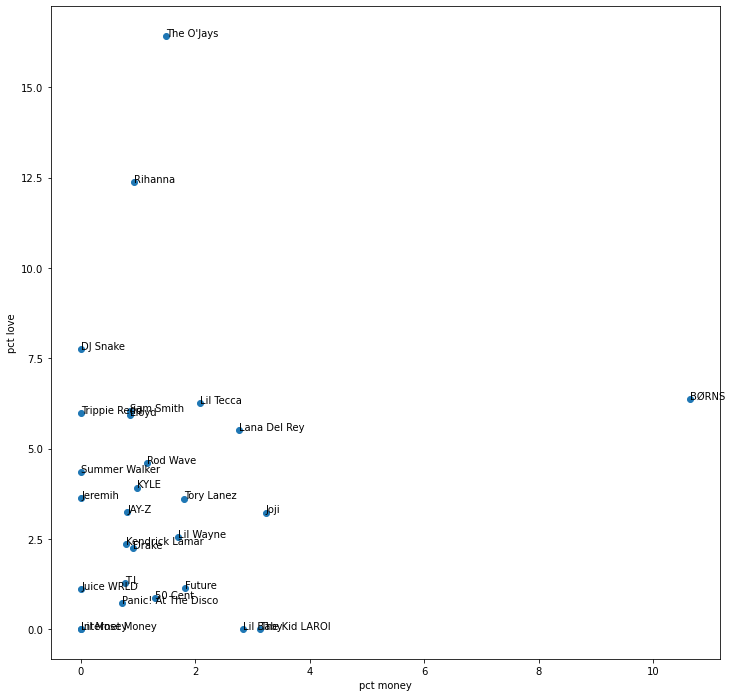

In [172]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X, Y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (X[i], Y[i]))
    
ax.set_xlabel('pct money')  #These labels were backwards btw
ax.set_ylabel('pct love')
fig.set_size_inches(12, 12)  # If you want, you can make the plot even larger to make the points easier to see.

### Questions [10 points]

- Which artists tend to sing the most about money? Does this surprise you?

The artist who sings the most about money by far is BORNS which definitely surprises me because I did not take them as that type of band. Before starting this project I assumed for sure the artist who sings the most about money would be some rapper. Rappers did make an appearance in the top five though with The Kid LAROI and Lil Baby.

- Which artists tend to sing the most about love?  Does this surprise you?

The artist who sang the most about love was The O'Jays which does not surprise me because they are an R&B group from the 70s which cements the stereotype that they would sing a lot about love. Furthermore, I was not surprised about Rihanna singing about love because I imagine this works for her target audience. I was suprised with how much Lil Tecca and DJ Snake sing about love, although I do not know these artists at all, from their names I did not expect them to appear so high on this list.

### Extra credit [up to 25 points]

Modify this running example to keep track of the genre or gender of each artist (or anything else you are curious about). Redo the scatter plot and color points based on genre or gender or some other variable. Do you see anything interesting? You might want to look at a larger number of artists by looking at more pages while searching for love and money at the top of the notebook (using the Spotify API).

### Include all extra credit code below this line

After looking at the spotipy documentation I was interested by the .auido_features method. This tells us attributes about songs that Spotify has. Let's test out this method on the artists we have already collected.

In [185]:
spotify.audio_features("4XslNXIadAFZ1PmbELe5TB")

[{'danceability': 0.733,
  'energy': 0.693,
  'key': 1,
  'loudness': -8.419,
  'mode': 1,
  'speechiness': 0.2,
  'acousticness': 0.000831,
  'instrumentalness': 0,
  'liveness': 0.165,
  'valence': 0.298,
  'tempo': 100.034,
  'type': 'audio_features',
  'id': '4XslNXIadAFZ1PmbELe5TB',
  'uri': 'spotify:track:4XslNXIadAFZ1PmbELe5TB',
  'track_href': 'https://api.spotify.com/v1/tracks/4XslNXIadAFZ1PmbELe5TB',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4XslNXIadAFZ1PmbELe5TB',
  'duration_ms': 159813,
  'time_signature': 4}]

In [195]:
spotify.artist_top_tracks("3TVXtAsR1Inumwj472S9r4")["tracks"]

'2SAqBLGA283SUiwJ3xOUVI'

In [204]:
artist_ids = [artist_id for artist_id in artists["artist_id"].unique()]

In [205]:
results = pd.DataFrame([], columns=['artist_id', 'track', 'track_id', 'danceability', 'key',"tempo"])

track_info = []

def get_artists_top_tracks(list_of_artist_ids):
    for artist_id in list_of_artist_ids:
        for track in spotify.artist_top_tracks(artist_id)["tracks"]:
            dictionary = {}
            dictionary["artist_id"] = artist_id
            dictionary["track"] = track["name"]
            dictionary["track_id"] = track["id"]

            features = spotify.audio_features(track["id"])
            dictionary["danceability"] = features[0]["danceability"]
            dictionary["key"] = features[0]["key"]
            dictionary["tempo"] = features[0]["tempo"]

            track_info.append(dictionary)

get_artists_top_tracks(artist_ids)
results = pd.DataFrame(track_info, columns=['artist_id', 'track', 'track_id', 'danceability', 'key',"tempo"])


In [206]:
results

,artist_id,track,track_id,danceability,key,tempo
0,2YZyLoL8N0Wb9xBt1NhZWg,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,0.908,1,150.011
1,2YZyLoL8N0Wb9xBt1NhZWg,All The Stars (with SZA),3GCdLUSnKSMJhs4Tj6CV3s,0.698,8,96.924
2,2YZyLoL8N0Wb9xBt1NhZWg,LOVE. FEAT. ZACARI.,6PGoSes0D9eUDeeAafB2As,0.800,10,126.058
3,2YZyLoL8N0Wb9xBt1NhZWg,DNA.,6HZILIRieu8S0iqY8kIKhj,0.638,1,139.913
4,2YZyLoL8N0Wb9xBt1NhZWg,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,0.716,7,71.994
...,...,...,...,...,...,...
275,1Xfmvd48oOhEWkscWyEbh9,Caramel (feat. City Girls),0ZuMuZVtjK9vK5qSWC4bmu,0.691,5,136.057
276,1Xfmvd48oOhEWkscWyEbh9,Slow Wine Bass Line (feat. Teddy Riley),31CChSC1Sz3IG6dLjSpiM4,0.560,0,118.933
277,1Xfmvd48oOhEWkscWyEbh9,Dedication To My Ex (Miss That),0jmdMkRc7bmnmF9TNRfxF5,0.835,0,119.037
278,1Xfmvd48oOhEWkscWyEbh9,1999 (feat. Lloyd),7dveZsk7FG3K9uHCpUOh5A,0.699,6,158.026


In [212]:
ids = [ids for ids in results["artist_id"]]
names = []
for id_ in ids:
    names.append(spotify.artist(id_)["name"]) 

results["artist"] = names

In [213]:
results

,artist_id,track,track_id,danceability,key,tempo,artist
0,2YZyLoL8N0Wb9xBt1NhZWg,HUMBLE.,7KXjTSCq5nL1LoYtL7XAwS,0.908,1,150.011,Kendrick Lamar
1,2YZyLoL8N0Wb9xBt1NhZWg,All The Stars (with SZA),3GCdLUSnKSMJhs4Tj6CV3s,0.698,8,96.924,Kendrick Lamar
2,2YZyLoL8N0Wb9xBt1NhZWg,LOVE. FEAT. ZACARI.,6PGoSes0D9eUDeeAafB2As,0.800,10,126.058,Kendrick Lamar
3,2YZyLoL8N0Wb9xBt1NhZWg,DNA.,6HZILIRieu8S0iqY8kIKhj,0.638,1,139.913,Kendrick Lamar
4,2YZyLoL8N0Wb9xBt1NhZWg,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,0.716,7,71.994,Kendrick Lamar
...,...,...,...,...,...,...,...
275,1Xfmvd48oOhEWkscWyEbh9,Caramel (feat. City Girls),0ZuMuZVtjK9vK5qSWC4bmu,0.691,5,136.057,Lloyd
276,1Xfmvd48oOhEWkscWyEbh9,Slow Wine Bass Line (feat. Teddy Riley),31CChSC1Sz3IG6dLjSpiM4,0.560,0,118.933,Lloyd
277,1Xfmvd48oOhEWkscWyEbh9,Dedication To My Ex (Miss That),0jmdMkRc7bmnmF9TNRfxF5,0.835,0,119.037,Lloyd
278,1Xfmvd48oOhEWkscWyEbh9,1999 (feat. Lloyd),7dveZsk7FG3K9uHCpUOh5A,0.699,6,158.026,Lloyd


In [216]:
from scipy import stats
artist_gb = results.groupby("artist").agg({"danceability":"mean",
                                          "key":stats.mode,
                                          "tempo":"mean"})


In [217]:
artist_gb

,danceability,key,tempo
artist,,,
50 Cent,0.7393,"([6], [3])",96.9506
BØRNS,0.5821,"([6], [4])",127.8981
DJ Snake,0.7108,"([8], [4])",119.2890
Drake,0.7786,"([1], [2])",116.6135
Future,0.8014,"([1], [2])",143.8301
Internet Money,0.7499,"([1], [3])",132.3205
JAY-Z,0.6972,"([1], [2])",116.7747
Jeremih,0.6673,"([6], [3])",123.3560
Joji,0.6103,"([7], [4])",129.8505


In [218]:
X = [value for value in artist_gb["danceability"]]
Y = [value for value in artist_gb["tempo"]]
labels = [artist for artist in artist_gb.index]

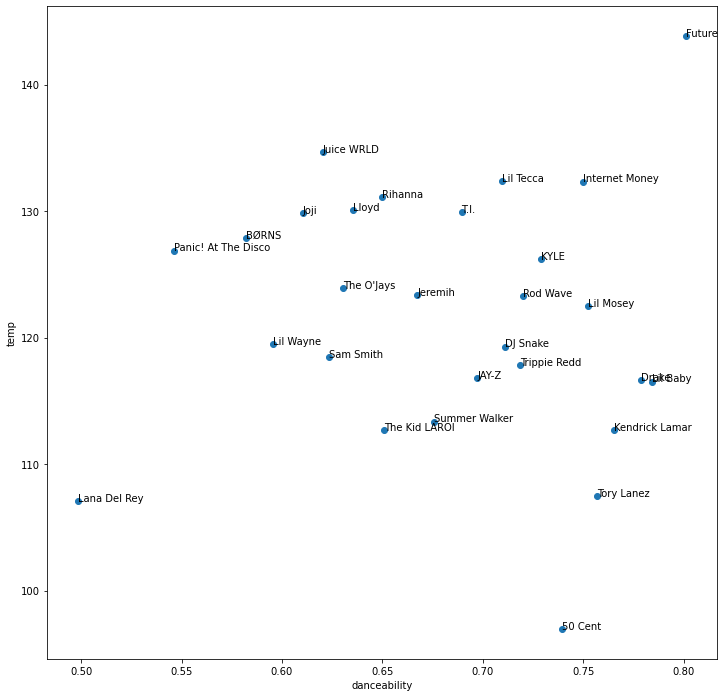

In [219]:
fig, ax = plt.subplots()

ax.scatter(X, Y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (X[i], Y[i]))
    
ax.set_xlabel('danceability') 
ax.set_ylabel('temp')
fig.set_size_inches(12, 12)  # If you want, you can make the plot even larger to make the points easier to see.

Here we see that among the artists we have been working with, Future has the most consistent "danceable" songs and the most up tempo songs. When looking at this plot you can see that the majority of artists who scored high on average danceability appear to be rappers. When you get on the lower half of danceability you get to artists from other genres which is a conclusion that makes sense, but is interesting nonetheless. 

#### Keys

Copied from WikiPedia

**Pitch class**



0	C (also B♯, Ddouble flat)	do

1	C♯, D♭ (also Bdouble sharp)	

2	D (also Cdouble sharp, Edouble flat)	re

3	D♯, E♭ (also Fdouble flat)	

4	E (also Ddouble sharp, F♭)	mi

5	F (also E♯, Gdouble flat)	fa

6	F♯, G♭ (also Edouble sharp)	

7	G (also Fdouble sharp, Adouble flat)	sol

8	G♯, A♭	

9	A (also Gdouble sharp, Bdouble flat)	la

10, t or A	A♯, B♭ (also Cdouble flat)	

11, e or B	B (also Adouble sharp, C♭)	ti

In [221]:
results.value_counts("key")

key
1     38
6     36
0     34
5     31
7     30
11    29
9     19
8     19
10    17
2     17
4      8
3      2
dtype: int64

The most common keys among these artists are C#, F#, and C.

New question: Do the popular keys differ among the highly rated songs in "danceability" compared to the lower rated songs?

In [224]:
mean = results["danceability"].mean()
mean

0.6816785714285716

In [225]:
lower_dance = results[results["danceability"] < mean]
higher_dance = results[results["danceability"] > mean]

<BarContainer object of 12 artists>

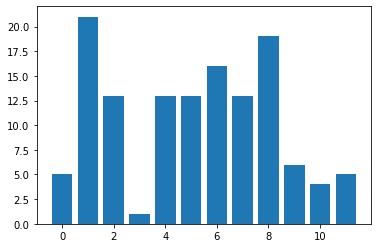

In [238]:
y = lower_dance.value_counts("key")

plt.bar(x=lower_dance["key"].unique(),height=y)

<BarContainer object of 12 artists>

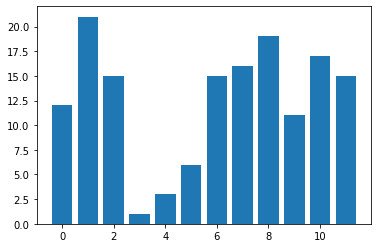

In [231]:
counts = higher_dance.value_counts("key")
plt.bar(x=higher_dance["key"].unique(),height=counts)

We see that there are mostly similarities between the keys. However, it is clear that songs with lower levels of danceability use the keys 4 & 5 more often which correspond to the keys of E and F. Additionally, songs with higher levels of danceability use the keys 0, 9, 10, and 11 more which correspond to C, A, C double flat, and A double sharp. 

# Concluding Thoughts

I would have loved to have analyzed the lyrics of songs in order to truly find out who sings the most about love or money, rather than these words just being in the song titles. However, I realize that is not quite possible with the Spotify API and would also be a massive data collection project. Maybe this is something I could come back to in the future after learning more about natural language processing. 

Overall, the Spotify API is a great API due to its well made documentation. All it takes is to get into the data and understand what it is you are working with. I am glad to have gotten some great practice with APIs and honestly look forward to trying new ones in the future.